In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

## How the FFT works, speed tests

16.453222946000096 0.00033889899987116223


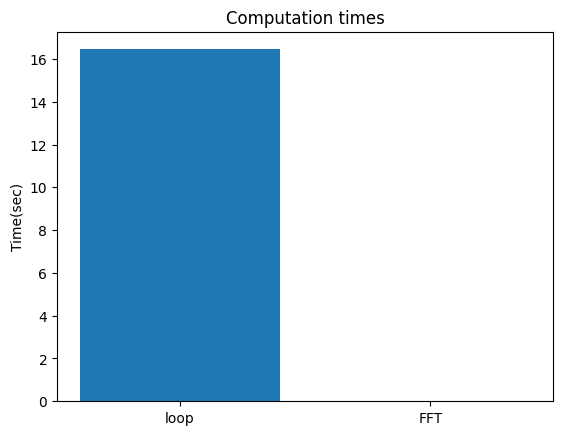

In [ ]:
#create a signal
pnts = 10000
signal = np.random.rand(pnts)

#tic = datetime.now().second
tic = timeit.default_timer()


# Fourier Transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs = np.zeros(len(signal), dtype=complex)

for fi in range(pnts):
  csw = np.exp(-1j*2*np.pi*fi*fourTime)
  fCoefs[fi] = sum(np.multiply(csw,signal))

toc = timeit.default_timer()
#toc = datetime.now().second
t1 = toc-tic

# Fast Fourier Transform
#tic = datetime.now().second
tic = timeit.default_timer()

fCoefsf = scipy.fftpack.fft(signal)
#toc = datetime.now().second
toc = timeit.default_timer()

t2 = toc-tic
print(t1,t2)

## Plot
plt.bar([1,2],[t1,t2])
plt.ylabel('Time(sec)')
plt.title('Computation times')
plt.xticks([1,2],['loop','FFT'])
plt.show()


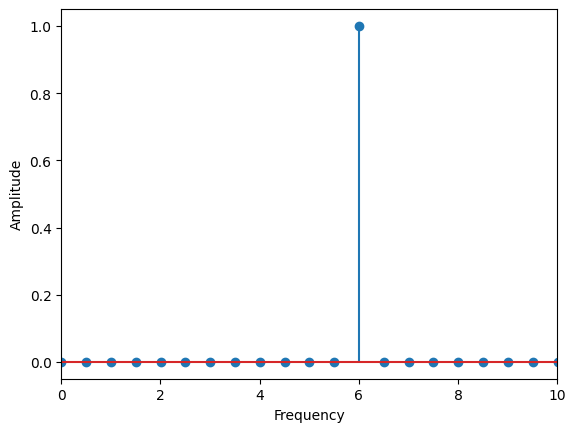

In [ ]:
## FFT still needs normalization

srate = 1000
time = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*6*time)

# Fourier Spectrum
signalX = scipy.fftpack.fft(signal) /npnts
hz = np.linspace(0,srate,npnts)

#amplitude
ampls = np.abs(signalX[0:len(hz)])

#plt.stem(time,signalX)
plt.stem(hz,ampls)
plt.xlim(0,10)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## Fast IFT

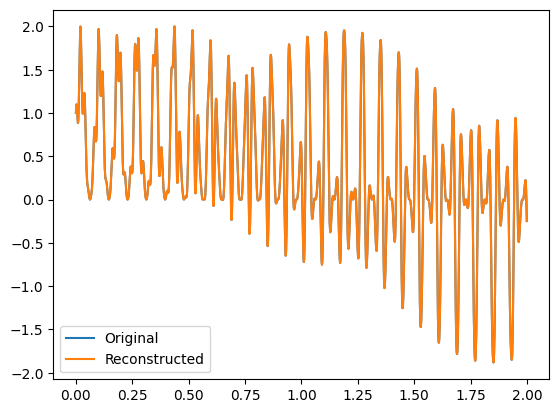

In [ ]:
srate = 1000
time = np.arange(0,2,1/srate)
pnts = len(time)
signal = np.multiply( (1+np.sin(2*np.pi*12*time)), np.cos(np.sin(2*np.pi*25*time)+time))

#fft
signalX = scipy.fftpack.fft(signal)

#ift
reconSig = scipy.fftpack.ifft(signalX)

plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSig),label='Reconstructed')
plt.legend()
plt.show()

## Perfection of Fourier Transform

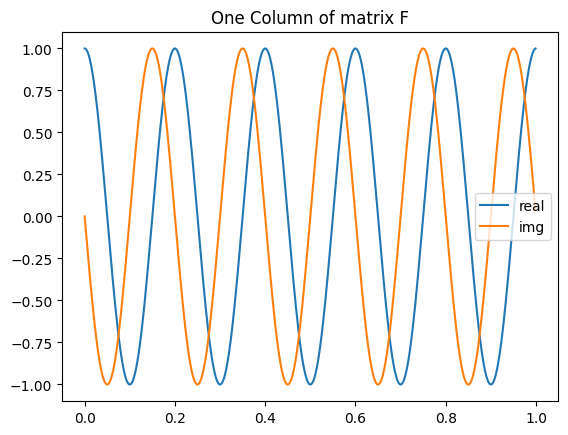

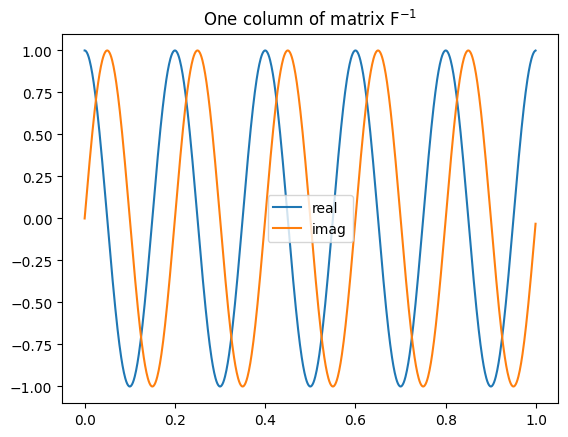

In [ ]:
pnts =1000

fourTime = np.array(range(0,pnts))/pnts
F = np.zeros((pnts,pnts),dtype=complex)

for fi in range(0,pnts):
  csw = np.exp(-1j*2*np.pi*fi*fourTime)
  F[:,fi] = csw

# compute inverse of F (and normalize by N)
Finv = np.linalg.inv(F)*pnts

#plot
plt.plot(fourTime,np.real(F[:,5]),label='real')
plt.plot(fourTime,np.imag(F[:,5]),label='img')
plt.title('One Column of matrix F')
plt.legend()
plt.show()

plt.plot(fourTime,np.real(Finv[:,5]),label='real')
plt.plot(fourTime,np.imag(Finv[:,5]),label='imag')
plt.title('One column of matrix F$^{-1}$')
plt.legend()
plt.show()


## Using the fft on matrices

In [ ]:
import numpy.matlib

#dataset
srate = 400
time = np.arange(0,srate*2)/srate
npnts = len(time)
nreps = 50

data = np.matlib.repmat( np.sin(2*np.pi*10*time),nreps,1)
data.shape

(50, 800)

In [ ]:
# FFT of data along each dimension

dataX1 = scipy.fftpack.fft(data,axis=0) / npnts
dataX2 = scipy.fftpack.fft(data,axis=1) / npnts
hz = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))

# check sizes
print(np.shape(dataX1))
print(np.shape(dataX2))

(50, 800)
(50, 800)


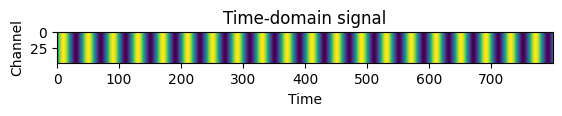

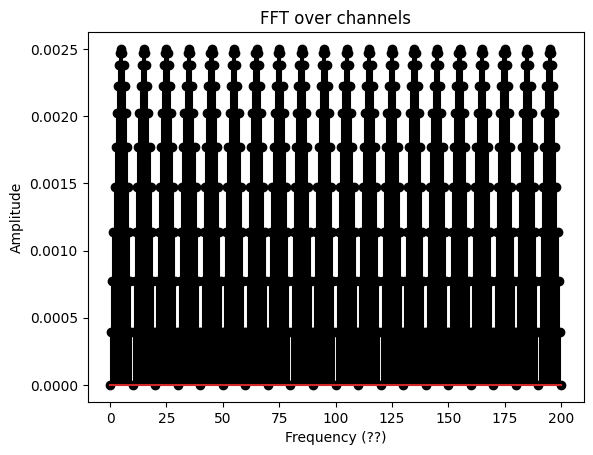

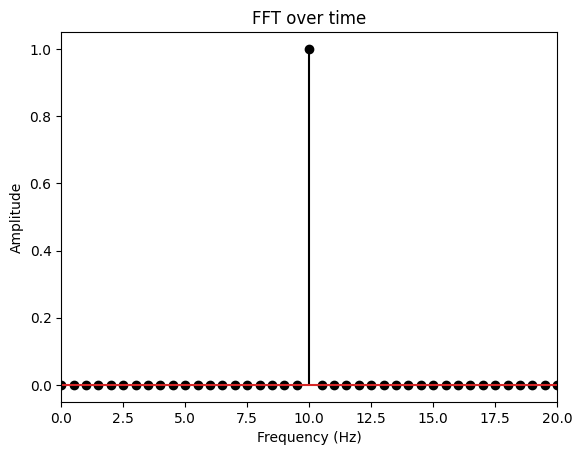

In [ ]:
# show data and spectra!
plt.imshow(data)
plt.xlabel('Time')
plt.ylabel('Channel')
plt.title('Time-domain signal')
plt.show()

plt.stem(hz,np.mean( 2*abs(dataX1[:,:len(hz)]),axis=0),'k')
plt.xlabel('Frequency (??)')
plt.ylabel('Amplitude')
plt.title('FFT over channels')
plt.show()

plt.stem(hz,np.mean( 2*abs(dataX2[:,:len(hz)]),axis=0),'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0,20])
plt.title('FFT over time')
plt.show()